In [1]:
from pathlib import Path

from rljax.algorithm import SAC_Discrete
from rljax.trainer import Trainer
import numpy as np
import pandas as pd

from classes import Env, Preprocess

PATH = Path().cwd()

In [2]:
raw = Preprocess(PATH.joinpath('asset_data', 'SH_SDS_data.csv'))
data = raw.process()

In [3]:
def return_rewards(current, last, action, p, c):
    return sum(current) - sum(last)

In [4]:
# 23,400 seconds between 9:30am and 4pm broken in 10 second increments

NUM_AGENT_STEPS = 10000
SEED = 0
DAYS = 1
DAY = 2340

env = Env(data, no_trade_period=5, fixed_buy_cost=0, fixed_sell_cost=0, steps=DAY*DAYS, reward_func=return_rewards)
env_test = env.copy_env()

algo = SAC_Discrete(
    num_agent_steps=NUM_AGENT_STEPS,
    state_space=env.observation_space,
    action_space=env.action_space,
    seed=SEED,
    batch_size=256,
    start_steps=1000,
    update_interval=1,
    update_interval_target=400
)

trainer = Trainer(
    env=env,
    env_test=env_test,
    algo=algo,
    log_dir="",
    num_agent_steps=NUM_AGENT_STEPS,
    eval_interval=2500,
    seed=SEED,
)
trainer.train()

Num steps: 2500     Return: 34.6    Time: 0:00:54
Num steps: 5000     Return: 48.6    Time: 0:01:57
Num steps: 7500     Return: 83.2    Time: 0:02:49
Num steps: 10000    Return: 85.3    Time: 0:03:45


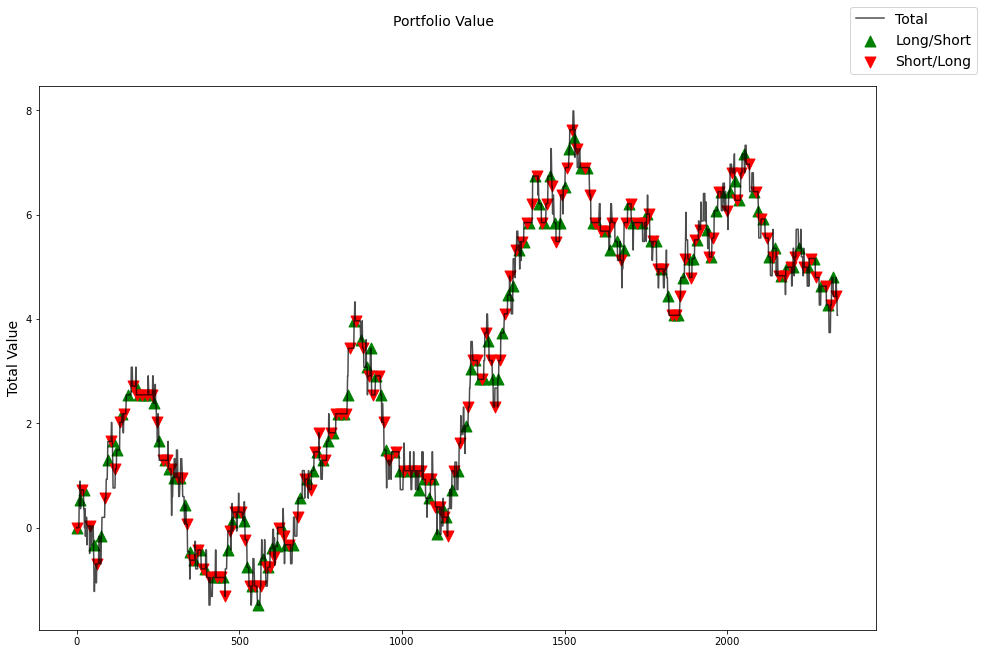

In [5]:
env.plot()

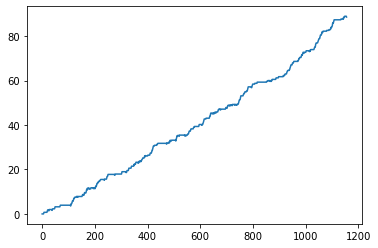

In [6]:
import matplotlib.pyplot as plt
plt.plot(np.sum(env_test.portfolio_history, axis = 1))

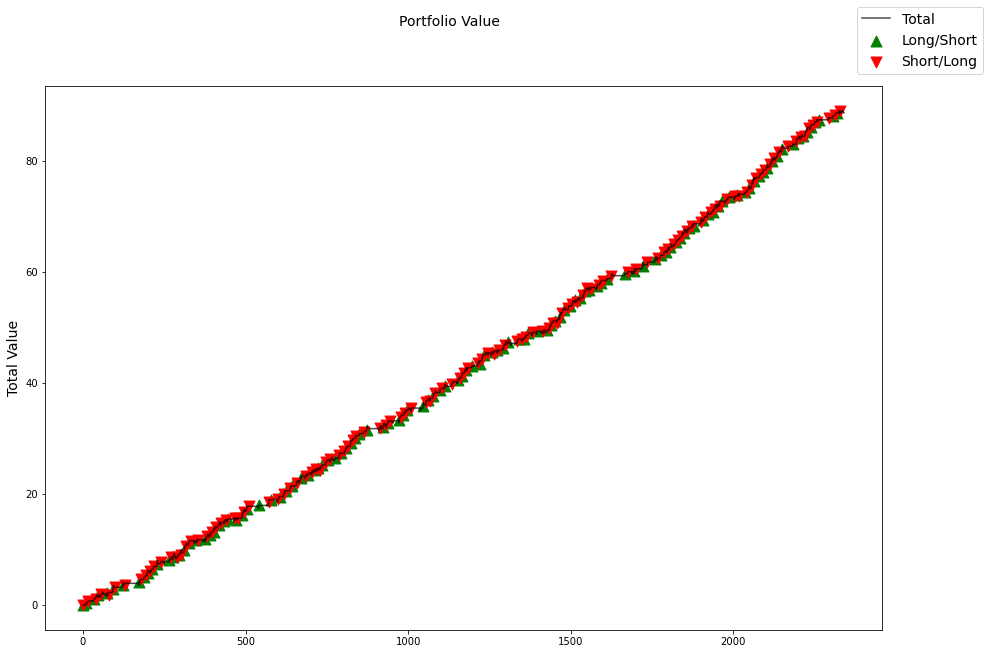

In [7]:
env_test.plot()

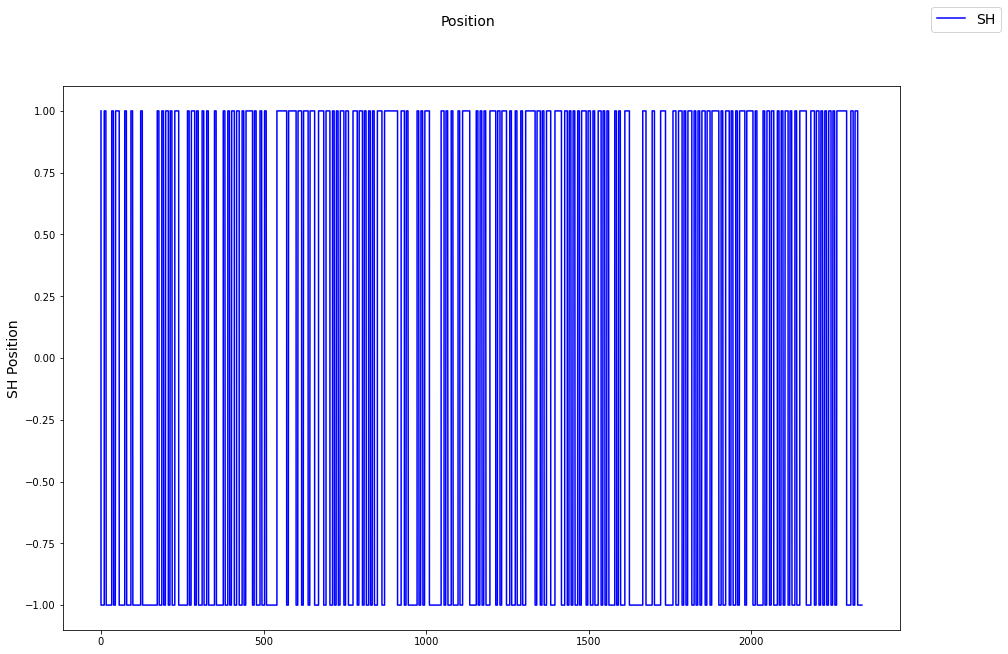

In [8]:
env_test.plot('position_history')

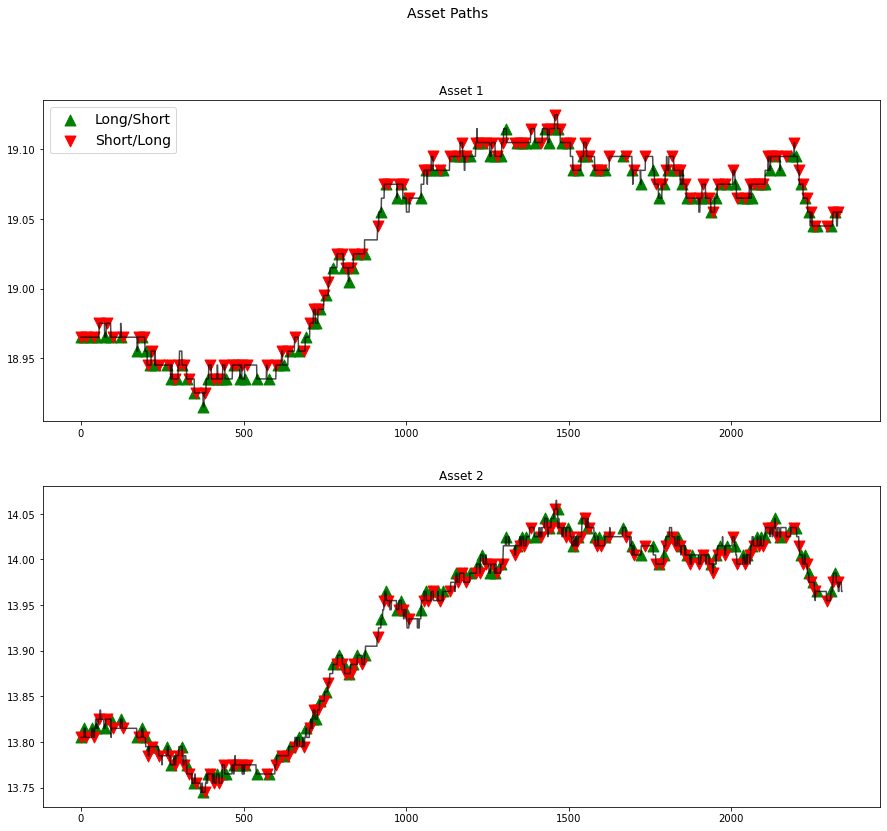

In [9]:
env_test.plot('asset_paths')

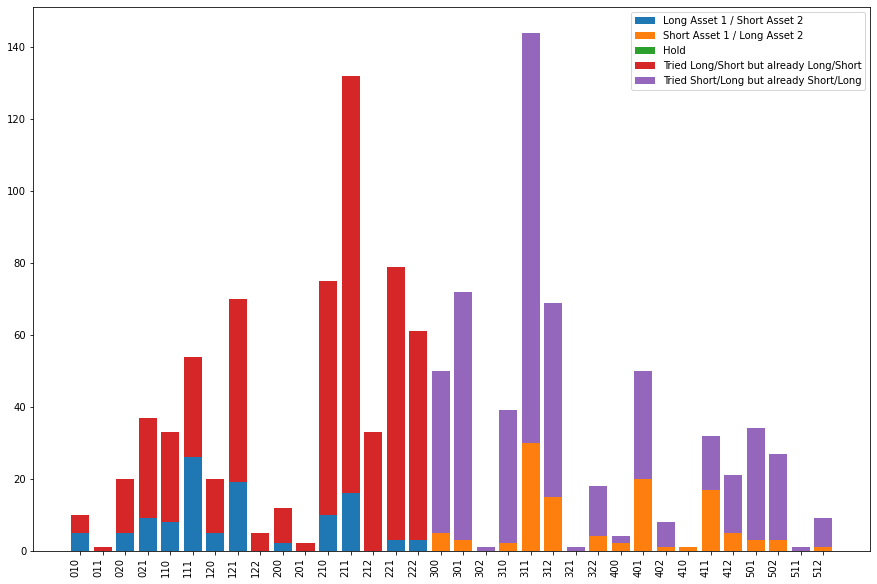

In [10]:
env_test.summarize_decisions()